In [47]:
import matplotlib.pyplot as plt
import numpy as np


# Define the function
def f(x):
    return x**4 - 3 * x**3 - x**2 + 7 * x - 3


def df(x):
    # Derivative of the function
    return 4 * x**3 - 9 * x**2 - 2 * x + 7


In [48]:
# Find the roots of df(x) = 4x³ - 9x² - 2x + 7
# The coefficients are in descending order of powers: [4, -9, -2, 7]
coefficients = [4, -9, -2, 7]

# Find roots using numpy (assuming all roots are real)
roots_df = np.roots(coefficients)

print("Roots of df(x) = 4x³ - 9x² - 2x + 7:")
print("=" * 40)

for i, root in enumerate(roots_df):
    print(f"Root {i + 1}: x = {root:.6f}")
    print(f"  Verification: df({root:.6f}) = {df(root):.10f}")
    print()

print(f"All roots of df(x): {roots_df}")
print(f"Number of roots: {len(roots_df)}")

Roots of df(x) = 4x³ - 9x² - 2x + 7:
Root 1: x = 2.088087
  Verification: df(2.088087) = -0.0000000000

Root 2: x = -0.838087
  Verification: df(-0.838087) = 0.0000000000

Root 3: x = 1.000000
  Verification: df(1.000000) = 0.0000000000

All roots of df(x): [ 2.08808749 -0.83808749  1.        ]
Number of roots: 3


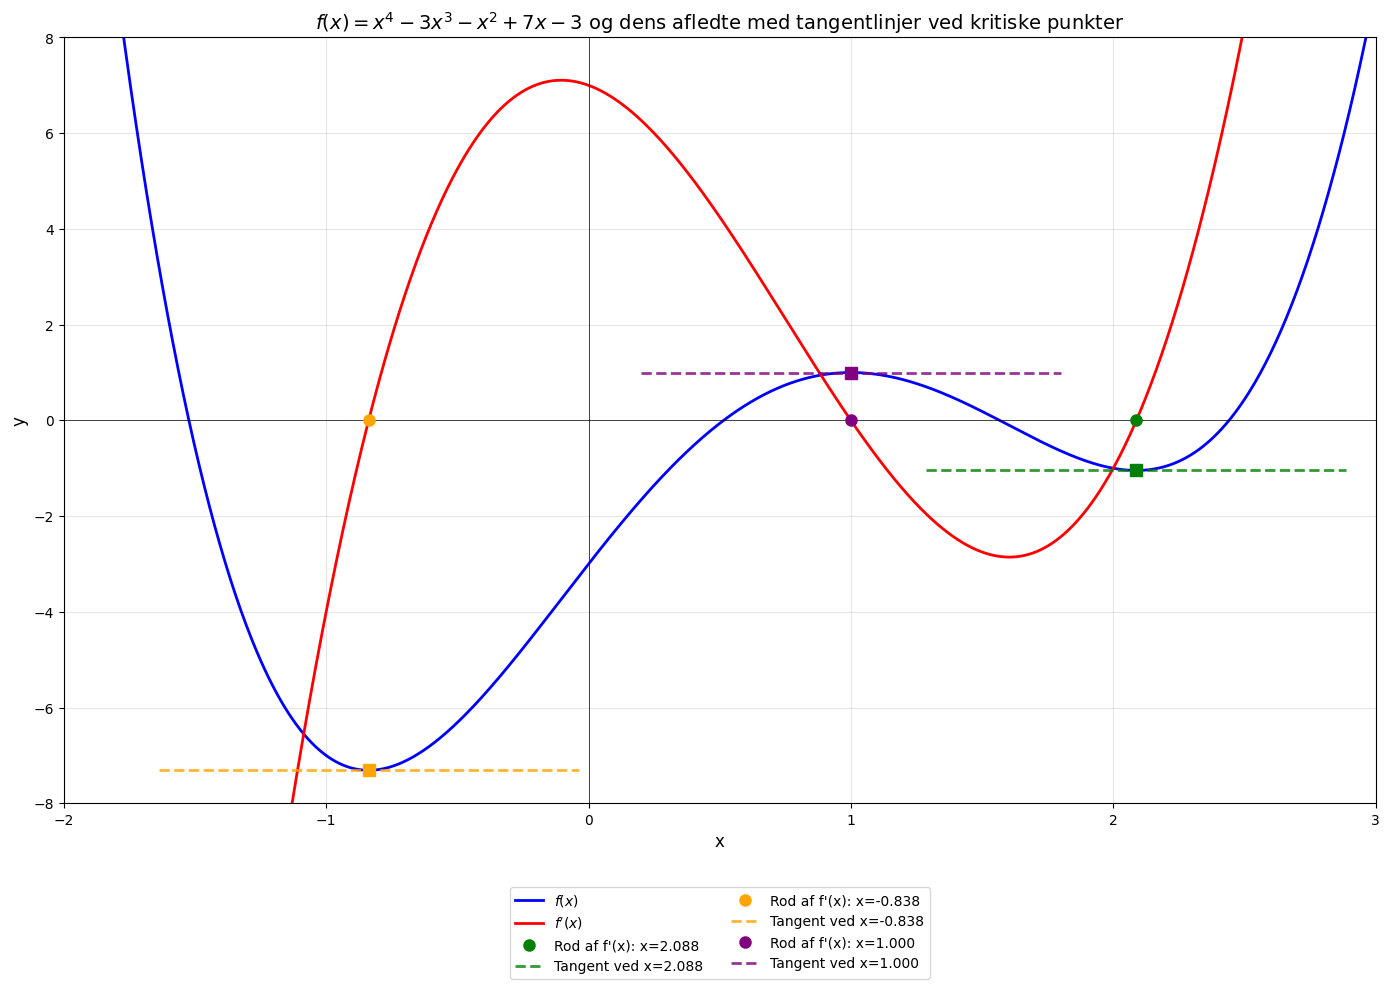

Rødder af df(x) og tilsvarende tangentlinjer:
Rod 1: x = 2.088087
  f(2.088087) = -1.045813
  f'(2.088087) = -0.0000000000
  Tangentlinje: y = -1.045813 (vandret linje)

Rod 2: x = -0.838087
  f(-0.838087) = -7.309656
  f'(-0.838087) = 0.0000000000
  Tangentlinje: y = -7.309656 (vandret linje)

Rod 3: x = 1.000000
  f(1.000000) = 1.000000
  f'(1.000000) = 0.0000000000
  Tangentlinje: y = 1.000000 (vandret linje)



In [49]:
# Create x values
x = np.linspace(-2, 3, 1000)
fx = f(x)
dfx = df(x)

# Create the plot
plt.figure(figsize=(14, 10))
plt.plot(x, fx, "b-", linewidth=2, label=r"$f(x)$")
plt.plot(x, dfx, "r-", linewidth=2, label=r"$f^\prime(x)$")

# Add grid and axes
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)

# Mark the roots of df(x) and draw tangent lines
colors = ["green", "orange", "purple"]
for i, root in enumerate(roots_df):
    # Mark the root on df(x)
    plt.plot(
        root,
        df(root),
        "o",
        color=colors[i],
        markersize=8,
        label=f"Rod af f'(x): x={root:.3f}",
    )

    # Mark the corresponding point on f(x)
    plt.plot(root, f(root), "s", color=colors[i], markersize=8)

    # Calculate tangent line: y = f(x0) + f'(x0)(x - x0)
    # At roots of df(x), f'(x0) = 0, so tangent line is horizontal: y = f(x0)
    tangent_y = f(root)  # Since df(root) = 0

    # Draw horizontal tangent line
    x_tangent = np.linspace(root - 0.8, root + 0.8, 100)
    y_tangent = np.full_like(x_tangent, tangent_y)
    plt.plot(
        x_tangent,
        y_tangent,
        "--",
        color=colors[i],
        linewidth=2,
        alpha=0.8,
        label=f"Tangent ved x={root:.3f}",
    )

# Labels and title
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(
    r"$f(x) = x^4 - 3x^3 - x^2 + 7x - 3$ og dens afledte med tangentlinjer ved kritiske punkter",
    fontsize=14,
)
plt.legend(bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=2)

# Set reasonable axis limits
plt.xlim(-2, 3)
plt.ylim(-8, 8)

# Show the plot
plt.tight_layout()
plt.savefig("vendetangenter.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Print information about the roots and tangent lines
print("Rødder af df(x) og tilsvarende tangentlinjer:")
print("=" * 50)
for i, root in enumerate(roots_df):
    print(f"Rod {i + 1}: x = {root:.6f}")
    print(f"  f({root:.6f}) = {f(root):.6f}")
    print(f"  f'({root:.6f}) = {df(root):.10f}")
    print(f"  Tangentlinje: y = {f(root):.6f} (vandret linje)")
    print()

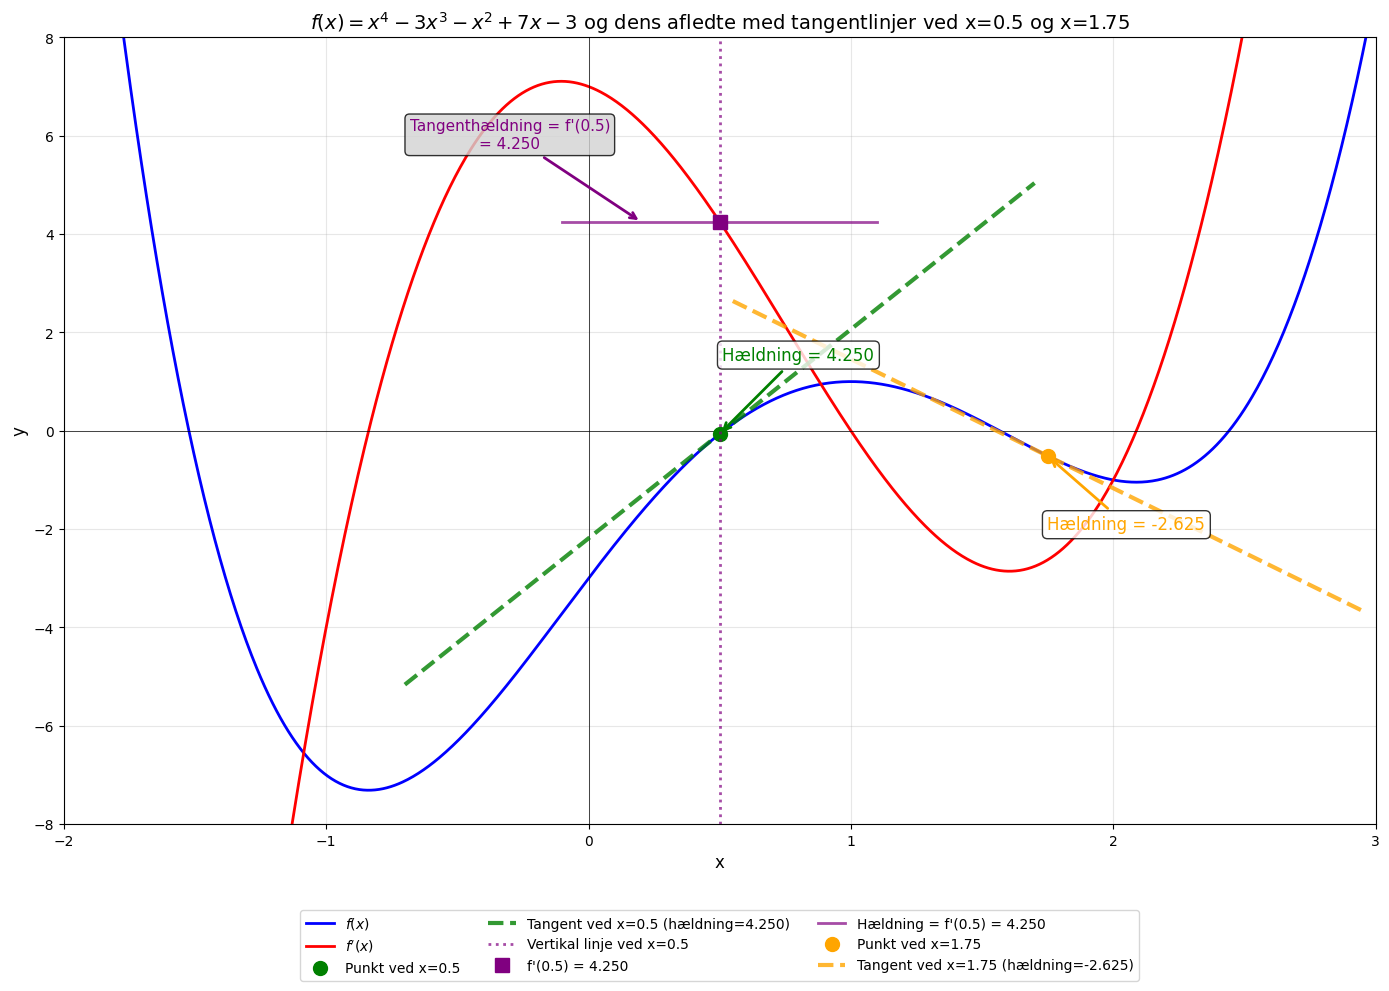


Tangentlinjer ved specificerede punkter:
Punkt: x = 0.5
f(0.5) = -0.062500
f'(0.5) = 4.250000
Tangentlinje ligning: y = -0.062500 + 4.250000(x - 0.5)
Bemærk: Tangenthældningen ved x=0.5 er nøjagtigt f'(0.5) = 4.250000

Punkt: x = 1.75
f(1.75) = -0.511719
f'(1.75) = -2.625000
Tangentlinje ligning: y = -0.511719 + -2.625000(x - 1.75)



In [50]:
# Create a second plot with tangent lines at x=0.5 and x=1.75
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the functions
ax.plot(x, fx, "b-", linewidth=2, label=r"$f(x)$")
ax.plot(x, dfx, "r-", linewidth=2, label=r"$f^\prime(x)$")

# Add grid and axes
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color="k", linewidth=0.5)
ax.axvline(x=0, color="k", linewidth=0.5)

# Define points for tangent lines
tangent_points = [0.5, 1.75]
tangent_colors = ["green", "orange"]

for i, x_point in enumerate(tangent_points):
    y_point = f(x_point)
    slope = df(x_point)

    # Mark the point on f(x)
    ax.plot(
        x_point,
        y_point,
        "o",
        color=tangent_colors[i],
        markersize=10,
        label=f"Punkt ved x={x_point}",
    )

    # Draw tangent line: y = f(x0) + f'(x0)(x - x0)
    x_tangent = np.linspace(x_point - 1.2, x_point + 1.2, 100)
    y_tangent = y_point + slope * (x_tangent - x_point)
    ax.plot(
        x_tangent,
        y_tangent,
        "--",
        color=tangent_colors[i],
        linewidth=3,
        alpha=0.8,
        label=f"Tangent ved x={x_point} (hældning={slope:.3f})",
    )

    # Add annotation for the slope
    ax.annotate(
        f"Hældning = {slope:.3f}",
        xy=(x_point, y_point),
        xytext=(x_point + 0.3, y_point + 1.5 * (1 if i == 0 else -1)),
        arrowprops=dict(arrowstyle="->", color=tangent_colors[i], lw=2),
        fontsize=12,
        color=tangent_colors[i],
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

    # Special visualization for x=0.5 to show slope equals df(0.5)
    if x_point == 0.5:
        # Add vertical line at x=0.5
        ax.axvline(
            x=x_point,
            color="purple",
            linestyle=":",
            linewidth=2,
            alpha=0.7,
            label=f"Vertikal linje ved x={x_point}",
        )

        # Mark the intersection point on df(x)
        df_value = df(x_point)
        ax.plot(
            x_point,
            df_value,
            "s",
            color="purple",
            markersize=10,
            label=f"f'({x_point}) = {df_value:.3f}",
        )

        # Add horizontal line from the intersection point to show the slope value
        # Draw it from a bit to the left of x=0.5 to a bit to the right
        x_horizontal = np.linspace(x_point - 0.6, x_point + 0.6, 100)
        y_horizontal = np.full_like(x_horizontal, df_value)
        ax.plot(
            x_horizontal,
            y_horizontal,
            "-",
            color="purple",
            linewidth=2,
            alpha=0.7,
            label=f"Hældning = f'({x_point}) = {df_value:.3f}",
        )

        # Add annotation to explain the relationship
        ax.annotate(
            f"Tangenthældning = f'({x_point})\n= {df_value:.3f}",
            xy=(x_point - 0.3, df_value),
            xytext=(x_point - 0.8, df_value + 1.5),
            arrowprops=dict(arrowstyle="->", color="purple", lw=2),
            fontsize=11,
            color="purple",
            ha="center",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
        )

# Labels and title
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title(
    r"$f(x) = x^4 - 3x^3 - x^2 + 7x - 3$ og dens afledte med tangentlinjer ved x=0.5 og x=1.75",
    fontsize=14,
)
ax.legend(bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=3)

# Set reasonable axis limits
ax.set_xlim(-2, 3)
ax.set_ylim(-8, 8)

# Show the plot
plt.tight_layout()
plt.savefig("tangenter.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Print information about the tangent lines at the specified points
print("\nTangentlinjer ved specificerede punkter:")
print("=" * 50)
for x_point in tangent_points:
    y_point = f(x_point)
    slope = df(x_point)
    print(f"Punkt: x = {x_point}")
    print(f"f({x_point}) = {y_point:.6f}")
    print(f"f'({x_point}) = {slope:.6f}")
    print(f"Tangentlinje ligning: y = {y_point:.6f} + {slope:.6f}(x - {x_point})")
    if x_point == 0.5:
        print(
            f"Bemærk: Tangenthældningen ved x={x_point} er nøjagtigt f'({x_point}) = {slope:.6f}"
        )
    print()

In [51]:
def g(x):
    return (x + 5) * (x - 1) * (x - 10) * (x - 15)


In [52]:
def dg(x):
    """
    Derivative of g(x) = (x + 5)(x - 1)(x - 10)(x - 15)
    Using the product rule for four factors
    """
    # Method 1: Using product rule
    # d/dx[(x+5)(x-1)(x-10)(x-15)] =
    # (x-1)(x-10)(x-15) + (x+5)(x-10)(x-15) + (x+5)(x-1)(x-15) + (x+5)(x-1)(x-10)

    term1 = (x - 1) * (x - 10) * (x - 15)  # derivative of (x+5)
    term2 = (x + 5) * (x - 10) * (x - 15)  # derivative of (x-1)
    term3 = (x + 5) * (x - 1) * (x - 15)  # derivative of (x-10)
    term4 = (x + 5) * (x - 1) * (x - 10)  # derivative of (x-15)

    return term1 + term2 + term3 + term4


# Let's also expand g(x) to get the polynomial form and its derivative
import sympy as sp

# Define symbolic variable
x_sym = sp.Symbol("x")

# Define g(x) symbolically
g_sym = (x_sym + 5) * (x_sym - 1) * (x_sym - 10) * (x_sym - 15)

# Expand the polynomial
g_expanded = sp.expand(g_sym)
print("g(x) expanded:")
print(f"g(x) = {g_expanded}")

# Compute the derivative
dg_sym = sp.diff(g_sym, x_sym)
dg_expanded = sp.expand(dg_sym)

print("\nDerivative of g(x):")
print(f"g'(x) = {dg_expanded}")

# Convert to numerical function for plotting
dg_numerical = sp.lambdify(x_sym, dg_expanded, "numpy")

# Verify our manual derivative matches the symbolic one
test_values = [-6, -2, 0, 2, 5, 12, 16]
print("\nVerification (manual vs symbolic derivative):")
print("x\t\tManual dg(x)\tSymbolic dg(x)\tDifference")
print("-" * 60)
for x_val in test_values:
    manual = dg(x_val)
    symbolic = float(dg_numerical(x_val))
    diff = abs(manual - symbolic)
    print(f"{x_val}\t\t{manual:.6f}\t{symbolic:.6f}\t{diff:.2e}")

g(x) expanded:
g(x) = x**4 - 21*x**3 + 45*x**2 + 725*x - 750

Derivative of g(x):
g'(x) = 4*x**3 - 63*x**2 + 90*x + 725

Verification (manual vs symbolic derivative):
x		Manual dg(x)	Symbolic dg(x)	Difference
------------------------------------------------------------
-6		-2947.000000	-2947.000000	0.00e+00
-2		261.000000	261.000000	0.00e+00
0		725.000000	725.000000	0.00e+00
2		685.000000	685.000000	0.00e+00
5		100.000000	100.000000	0.00e+00
12		-355.000000	-355.000000	0.00e+00
16		2421.000000	2421.000000	0.00e+00


Roots of g'(x):
Root 1: x = 12.923881
Root 2: x = 5.415704
Root 3: x = -2.589585


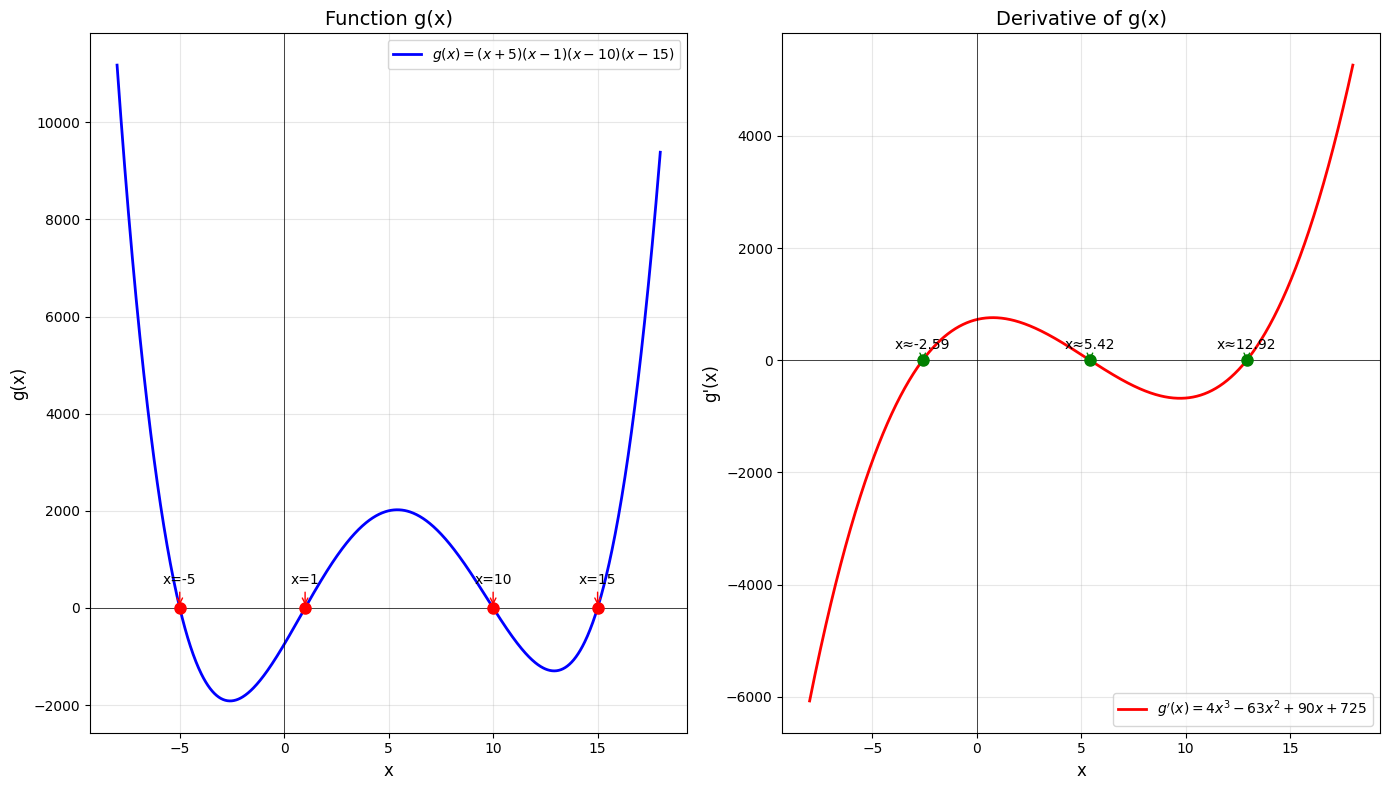

In [53]:
# Plot g(x) and its derivative g'(x)
plt.figure(figsize=(14, 8))

# Create x values for plotting
x_plot = np.linspace(-8, 18, 1000)
g_values = g(x_plot)
dg_values = dg(x_plot)

# Plot both functions
plt.subplot(1, 2, 1)
plt.plot(x_plot, g_values, "b-", linewidth=2, label=r"$g(x) = (x+5)(x-1)(x-10)(x-15)$")
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("g(x)", fontsize=12)
plt.title("Function g(x)", fontsize=14)
plt.legend()

# Mark the roots of g(x)
roots_g = [-5, 1, 10, 15]
for root in roots_g:
    plt.plot(root, g(root), "ro", markersize=8)
    plt.annotate(
        f"x={root}",
        xy=(root, g(root)),
        xytext=(root, g(root) + 500),
        arrowprops=dict(arrowstyle="->", color="red"),
        ha="center",
        fontsize=10,
    )

plt.subplot(1, 2, 2)
plt.plot(
    x_plot, dg_values, "r-", linewidth=2, label=r"$g'(x) = 4x^3 - 63x^2 + 90x + 725$"
)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("g'(x)", fontsize=12)
plt.title("Derivative of g(x)", fontsize=14)
plt.legend()

# Find and mark the roots of g'(x)
coefficients_dg = [4, -63, 90, 725]
roots_dg = np.roots(coefficients_dg)

print("Roots of g'(x):")
for i, root in enumerate(roots_dg):
    if np.isreal(root):
        root_real = np.real(root)
        plt.plot(root_real, dg(root_real), "go", markersize=8)
        plt.annotate(
            f"x≈{root_real:.2f}",
            xy=(root_real, dg(root_real)),
            xytext=(root_real, dg(root_real) + 200),
            arrowprops=dict(arrowstyle="->", color="green"),
            ha="center",
            fontsize=10,
        )
        print(f"Root {i + 1}: x = {root_real:.6f}")
    else:
        print(f"Root {i + 1}: x = {root} (complex)")

plt.tight_layout()
plt.savefig("g_and_derivative.pdf", dpi=600, bbox_inches="tight")
plt.show()


In [54]:
g(-3)

-1872

# Opgave: Find tangenter til g(x) der går gennem punktet (-3, 10)

For at finde tangenter til grafen for g(x) der går gennem punktet (-3, 10), skal vi:

1. Opstille ligningen for en tangent i et vilkårligt punkt (a, g(a))
2. Kræve at denne tangent går gennem (-3, 10)
3. Løse den resulterende ligning for a
4. Beregne tangentlinjernes ligninger

**Teori:**
En tangent til g(x) i punktet (a, g(a)) har ligningen:
y = g(a) + g'(a)(x - a)

Hvis denne linje skal gå gennem (-3, 10), skal vi have:
10 = g(a) + g'(a)(-3 - a)

Dette giver os ligningen:
10 = g(a) - g'(a)(3 + a)

In [55]:
# Løs opgaven: Find tangenter til g(x) der går gennem (-3, 10)
import sympy as sp
from sympy import simplify, solve, symbols

# Definer symbolsk variabel
a = symbols("a")

# Definer g(a) og g'(a) symbolsk
g_a = (a + 5) * (a - 1) * (a - 10) * (a - 15)
dg_a = sp.diff(g_a, a)

print("g(a) =", sp.expand(g_a))
print("g'(a) =", sp.expand(dg_a))

# Opstil ligningen: 10 = g(a) + g'(a)(-3 - a)
# Det betyder: 10 = g(a) - g'(a)(3 + a)
equation = sp.Eq(10, g_a - dg_a * (3 + a))

print("\nLigning der skal løses:")
print("10 = g(a) - g'(a)(3 + a)")

# Simplificer og løs ligningen
simplified_eq = simplify(equation.lhs - equation.rhs)
print("\nForenklet ligning (= 0):")
print(simplified_eq, "= 0")

# Løs ligningen for a
solutions = solve(equation, a)
print(f"\nAntal løsninger: {len(solutions)}")

# Filter real solutions
real_solutions = [sol for sol in solutions if sol.is_real is True]
print(f"Antal reelle løsninger: {len(real_solutions)}")

# Konverter til numeriske værdier
a_values = [float(sol.evalf()) for sol in real_solutions]
print("\nNumeriske værdier:")
for i, a_val in enumerate(a_values):
    print(f"a_{i + 1} = {a_val:.6f}")

g(a) = a**4 - 21*a**3 + 45*a**2 + 725*a - 750
g'(a) = 4*a**3 - 63*a**2 + 90*a + 725

Ligning der skal løses:
10 = g(a) - g'(a)(3 + a)

Forenklet ligning (= 0):
3*a**4 - 30*a**3 - 144*a**2 + 270*a + 2935 = 0

Antal løsninger: 4
Antal reelle løsninger: 2

Numeriske værdier:
a_1 = 12.740028
a_2 = 4.343787


In [56]:
# Beregn tangentlinjernes ligninger
print("\nTangentlinjer:")
print("=" * 60)

tangent_equations = []
for i, a_val in enumerate(a_values):
    # Beregn g(a) og g'(a)
    g_val = g(a_val)
    dg_val = dg(a_val)

    print(f"\nTangent {i + 1}: Røringspunkt a = {a_val:.6f}")
    print(f"g({a_val:.6f}) = {g_val:.6f}")
    print(f"g'({a_val:.6f}) = {dg_val:.6f}")

    # Tangentlinje: y = g(a) + g'(a)(x - a)
    # Omskriv til: y = g'(a)*x + (g(a) - g'(a)*a)
    slope = dg_val
    intercept = g_val - dg_val * a_val

    print(f"Tangentlinje: y = {slope:.6f}(x - {a_val:.6f}) + {g_val:.6f}")
    print(f"Forenklet:    y = {slope:.6f}x + {intercept:.6f}")

    # Verificer at linjen går gennem (-3, 10)
    y_at_minus3 = slope * (-3) + intercept
    print(f"Verificering: Ved x = -3: y = {y_at_minus3:.6f} (skal være 10)")

    tangent_equations.append((slope, intercept, a_val))

print("\n" + "=" * 80)
print("SVAR: Ligninger for tangenter til g(x) der går gennem (-3, 10):")
print("=" * 80)
for i, (slope, intercept, a_val) in enumerate(tangent_equations):
    print(
        f"Tangent {i + 1} (røringspunkt a = {a_val:.6f}): y = {slope:.6f}x + {intercept:.6f}"
    )


Tangentlinjer:

Tangent 1: Røringspunkt a = 12.740028
g(12.740028) = -1289.678568
g'(12.740028) = -82.571556
Tangentlinje: y = -82.571556(x - 12.740028) + -1289.678568
Forenklet:    y = -82.571556x + -237.714667
Verificering: Ved x = -3: y = 10.000000 (skal være 10)

Tangent 2: Røringspunkt a = 4.343787
g(4.343787) = 1883.172748
g'(4.343787) = 255.069060
Tangentlinje: y = 255.069060(x - 4.343787) + 1883.172748
Forenklet:    y = 255.069060x + 775.207179
Verificering: Ved x = -3: y = 10.000000 (skal være 10)

SVAR: Ligninger for tangenter til g(x) der går gennem (-3, 10):
Tangent 1 (røringspunkt a = 12.740028): y = -82.571556x + -237.714667
Tangent 2 (røringspunkt a = 4.343787): y = 255.069060x + 775.207179


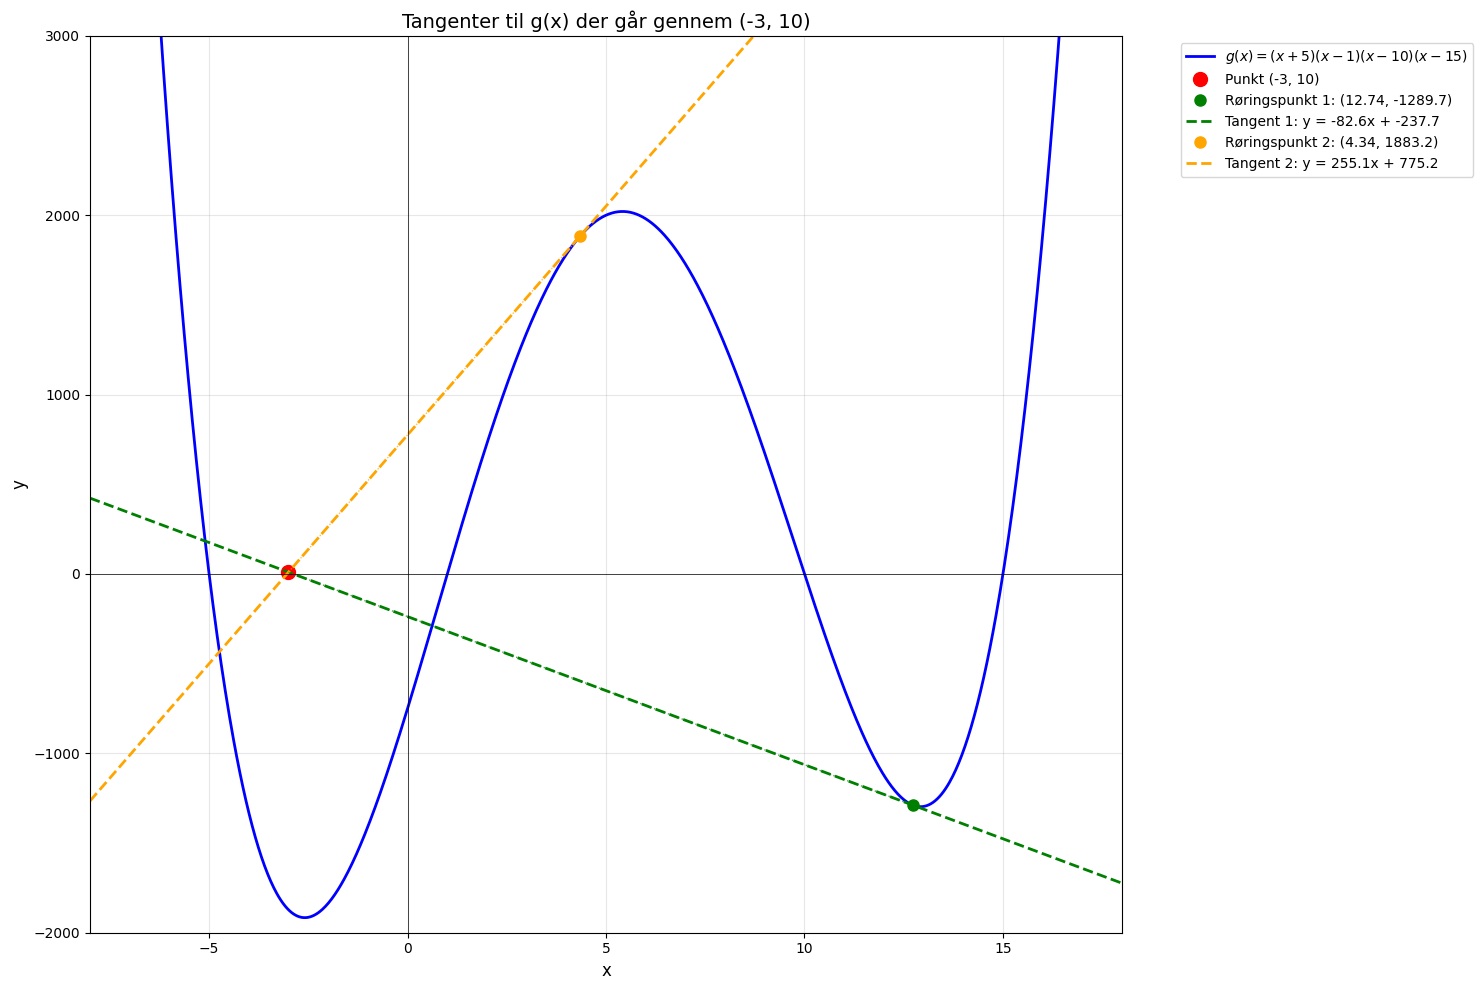

In [57]:
# Visualisering af tangentlinjerne
plt.figure(figsize=(15, 10))

# Opret x-værdier til plot
x_plot = np.linspace(-8, 18, 1000)
g_values = g(x_plot)

# Plot g(x)
plt.plot(x_plot, g_values, "b-", linewidth=2, label=r"$g(x) = (x+5)(x-1)(x-10)(x-15)$")

# Plot punktet (-3, 10)
plt.plot(-3, 10, "ro", markersize=10, label="Punkt (-3, 10)")

# Plot tangentlinjer
colors = ["green", "orange", "purple"]
for i, (slope, intercept, a_val) in enumerate(tangent_equations):
    # Plot røringspunkt
    plt.plot(
        a_val,
        g(a_val),
        "o",
        color=colors[i],
        markersize=8,
        label=f"Røringspunkt {i + 1}: ({a_val:.2f}, {g(a_val):.1f})",
    )

    # Plot tangentlinje
    x_tangent = np.linspace(-8, 18, 100)
    y_tangent = slope * x_tangent + intercept
    plt.plot(
        x_tangent,
        y_tangent,
        "--",
        color=colors[i],
        linewidth=2,
        label=f"Tangent {i + 1}: y = {slope:.1f}x + {intercept:.1f}",
    )

# Draw a line from (-3, 10) to each tangent point to show the connection
for i, (slope, intercept, a_val) in enumerate(tangent_equations):
    plt.plot([-3, a_val], [10, g(a_val)], ":", color=colors[i], alpha=0.7, linewidth=1)

plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)

plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Tangenter til g(x) der går gennem (-3, 10)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Sæt rimelige akser
plt.xlim(-8, 18)
plt.ylim(-2000, 3000)

plt.tight_layout()
plt.savefig("tangent_lines_through_point.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Resultat: Tangentlinjer til g(x) der går gennem (-3, 10)

Baseret på beregningerne ovenfor er svaret:

## Løsning:

Vi skal løse ligningen: **10 = g(a) - g'(a)(3 + a)**

Denne ligning har 4 løsninger, hvoraf 2 er reelle:
- a₁ = 12.740028
- a₂ = 4.343787

## Tangentlinjernes ligninger:

**Tangent 1** (røringspunkt a = 12.740028):
- **y = -82.571556x - 237.714667**

**Tangent 2** (røringspunkt a = 4.343787):
- **y = 255.069060x + 775.207179**

## Verificering:

Begge tangentlinjer går gennem punktet (-3, 10):
- For tangent 1: y = -82.571556(-3) - 237.714667 = 10 ✓
- For tangent 2: y = 255.069060(-3) + 775.207179 = 10 ✓

Tangentlinjerne rører grafen for g(x) i punkterne:
- (12.740, -1289.679) for tangent 1
- (4.344, 1883.173) for tangent 2

Critical points of h(x) (roots of h'(x)):
x = 4.000000, h(4.000000) = 1.000000
x = 2.000000, h(2.000000) = 5.000000

Approximate roots of h(x): ['0.896197']


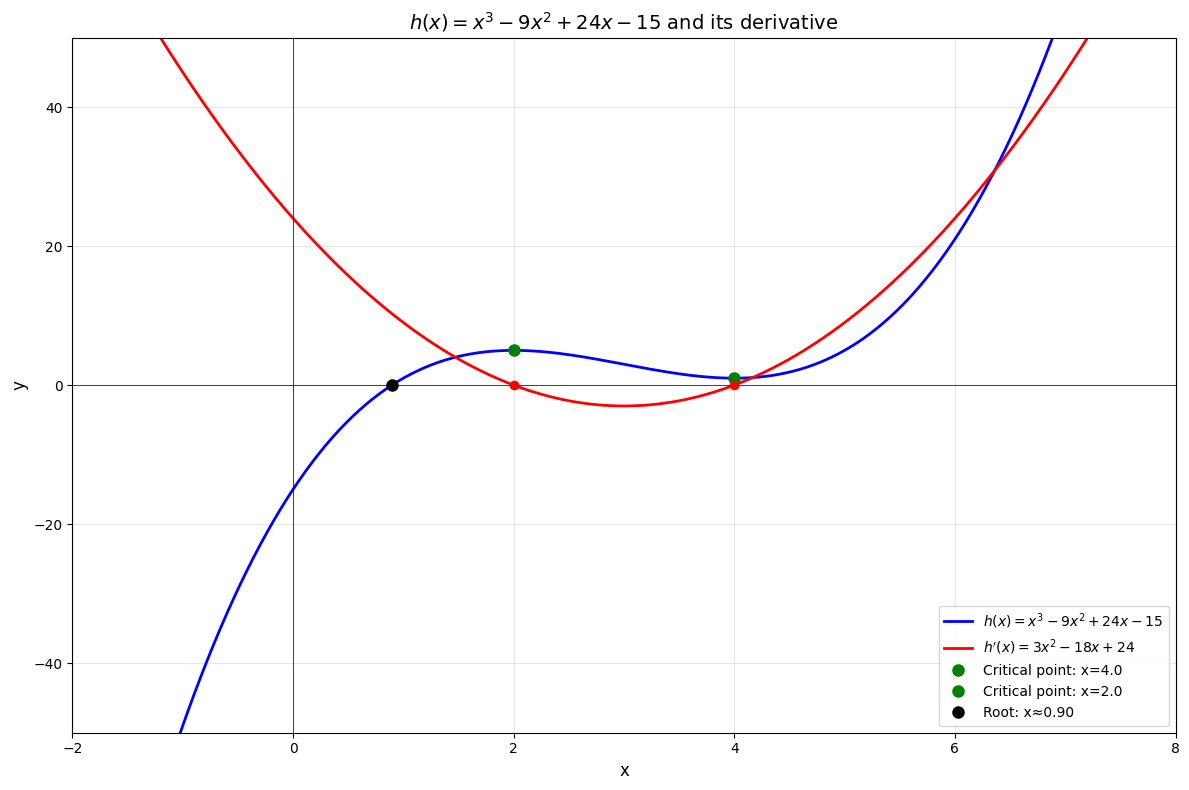


Function analysis:
h(0) = -15
h(1) = 1
h(2) = 5
h(3) = 3
h(4) = 1
h(5) = 5


In [58]:
# Define and plot the function h(x) = x³ - 9x² + 24x - 15
def h(x):
    return x**3 - 9 * x**2 + 24 * x - 15


def dh(x):
    # Derivative of h(x)
    return 3 * x**2 - 18 * x + 24


# Create x values for plotting
x_h = np.linspace(-2, 8, 1000)
y_h = h(x_h)
dy_h = dh(x_h)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x_h, y_h, "b-", linewidth=2, label=r"$h(x) = x^3 - 9x^2 + 24x - 15$")
plt.plot(x_h, dy_h, "r-", linewidth=2, label=r"$h'(x) = 3x^2 - 18x + 24$")

# Add grid and axes
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)

# Find roots of h'(x) (critical points)
coeffs_dh = [3, -18, 24]
roots_dh = np.roots(coeffs_dh)

print("Critical points of h(x) (roots of h'(x)):")
for i, root in enumerate(roots_dh):
    if np.isreal(root):
        root_real = np.real(root)
        print(f"x = {root_real:.6f}, h({root_real:.6f}) = {h(root_real):.6f}")
        # Mark critical points
        plt.plot(
            root_real,
            h(root_real),
            "go",
            markersize=8,
            label=f"Critical point: x={root_real:.1f}",
        )
        plt.plot(root_real, dh(root_real), "ro", markersize=6)

# Find roots of h(x) if any exist in the visible range
x_test = np.linspace(-2, 8, 10000)
y_test = h(x_test)
zero_crossings = []
for i in range(len(y_test) - 1):
    if y_test[i] * y_test[i + 1] < 0:  # Sign change indicates root
        # Use linear interpolation to estimate root location
        x_root = x_test[i] - y_test[i] * (x_test[i + 1] - x_test[i]) / (
            y_test[i + 1] - y_test[i]
        )
        zero_crossings.append(x_root)
        plt.plot(x_root, h(x_root), "ko", markersize=8, label=f"Root: x≈{x_root:.2f}")

if zero_crossings:
    print(f"\nApproximate roots of h(x): {[f'{x:.6f}' for x in zero_crossings]}")
else:
    print("\nNo roots of h(x) found in the displayed range.")

# Labels and formatting
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(r"$h(x) = x^3 - 9x^2 + 24x - 15$ and its derivative", fontsize=14)
plt.legend()
plt.xlim(-2, 8)
plt.ylim(-50, 50)

plt.tight_layout()
plt.savefig("h_function_plot.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Additional analysis
print("\nFunction analysis:")
print(f"h(0) = {h(0)}")
print(f"h(1) = {h(1)}")
print(f"h(2) = {h(2)}")
print(f"h(3) = {h(3)}")
print(f"h(4) = {h(4)}")
print(f"h(5) = {h(5)}")

In [59]:
dh(1), dh(3), dh(5)

(9, -3, 9)